In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator 

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score

In [2]:
final_df = pd.read_csv('final.csv', delimiter='\t')

In [3]:
final_df

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR
0,0,0.731169,1.0,Developed,0.001169,0.27
1,1,-0.268828,0.0,Developed,0.001172,0.27
2,2,0.731176,1.0,Developed,0.001176,0.27
3,3,0.731179,1.0,Developed,0.001179,0.27
4,4,1.731183,2.0,Developed,0.001183,0.27
...,...,...,...,...,...,...
1789656,1789656,36.732577,37.0,Coastal Salt Flats,0.002577,0.27
1789657,1789657,35.732579,36.0,Coastal Salt Flats,0.002579,0.27
1789658,1789658,36.732581,37.0,Coastal Salt Flats,0.002581,0.27
1789659,1789659,37.732582,38.0,Coastal Salt Flats,0.002582,0.27


In [4]:
# Step 1: Create Data Frame:
elevation_classes = pd.DataFrame()
elevation_classes['Elevation_Values'] = final_df.Elevation

# Step 2: Get Max and Min Values for Elevation
min_elev = final_df.Elevation.min()
max_elev = final_df.Elevation.max()

# Step 3: Create Intervals:
# Intervals
interval_0 = pd.cut(x=final_df["Elevation"], bins=[1, 5, 10, max_elev])
interval_1 = pd.cut(x=final_df["Elevation"], bins=[min_elev, -10, -1, 0], right=False)
interval_2 = pd.cut(x=final_df["Elevation"], bins=[0, 1], include_lowest=True)
# Encoding
encoding_0 = pd.cut(x=final_df["Elevation"], bins=[1, 5, 10, max_elev], labels=[4, 5, 6])
encoding_1 = pd.cut(x=final_df["Elevation"], bins=[min_elev, -10, -1, 0], right=False, labels=[0, 1, 2])
encoding_2 = pd.cut(x=final_df["Elevation"], bins=[0, 1], include_lowest=True, labels=[3])


# Step 4: Add intervals to dataframe:
elevation_classes['Intervals_0'] = interval_0
elevation_classes['Intervals_1'] = interval_1
elevation_classes['Intervals_2'] = interval_2
elevation_classes['Intervals'] = ''

elevation_classes.loc[ ((elevation_classes.Intervals_0.isnull()) & (elevation_classes.Intervals_1.isnull())), 'Intervals'] = interval_2
elevation_classes.loc[ ((elevation_classes.Intervals_0.isnull()) & (elevation_classes.Intervals_2.isnull())), 'Intervals'] = interval_1
elevation_classes.loc[ ((elevation_classes.Intervals_1.isnull()) & (elevation_classes.Intervals_2.isnull())), 'Intervals'] = interval_0

# Add class encoding
elevation_classes['Encoding_0'] = encoding_0
elevation_classes['Encoding_1'] = encoding_1
elevation_classes['Encoding_2'] = encoding_2
elevation_classes['Encoding'] = ''

elevation_classes.loc[ ((elevation_classes.Encoding_0.isnull()) & (elevation_classes.Encoding_1.isnull())), 'Encoding'] = encoding_2
elevation_classes.loc[ ((elevation_classes.Encoding_0.isnull()) & (elevation_classes.Encoding_2.isnull())), 'Encoding'] = encoding_1
elevation_classes.loc[ ((elevation_classes.Encoding_1.isnull()) & (elevation_classes.Encoding_2.isnull())), 'Encoding'] = encoding_0

elevation_classes.drop(['Intervals_2', 'Intervals_1', 'Intervals_0', 'Encoding_2', 'Encoding_1', 'Encoding_0'],
                       axis='columns', inplace=True)

In [5]:
final_df['Elevation'] = elevation_classes.Encoding
final_df

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR
0,0,0.731169,3,Developed,0.001169,0.27
1,1,-0.268828,3,Developed,0.001172,0.27
2,2,0.731176,3,Developed,0.001176,0.27
3,3,0.731179,3,Developed,0.001179,0.27
4,4,1.731183,4,Developed,0.001183,0.27
...,...,...,...,...,...,...
1789656,1789656,36.732577,6,Coastal Salt Flats,0.002577,0.27
1789657,1789657,35.732579,6,Coastal Salt Flats,0.002579,0.27
1789658,1789658,36.732581,6,Coastal Salt Flats,0.002581,0.27
1789659,1789659,37.732582,6,Coastal Salt Flats,0.002582,0.27


In [6]:
# # Step 3: Create Intervals for each df:
# # intervals are for all slr data frame:
min_mit = final_df.AE.min()
max_mit = final_df.AE.max()


interval_0_mit = pd.cut(x=final_df['AE'], bins=[1, 5, 10, max_mit])
interval_1_mit = pd.cut(x=final_df['AE'], bins=[min_mit, -12, -1, 0], right=False)
interval_2_mit = pd.cut(x=final_df['AE'], bins=[0, 1], include_lowest=True)

# Encoding
encoding_0 = pd.cut(x=final_df['AE'], bins=[1, 5, 10, max_elev], labels=[4, 5, 6])
encoding_1 = pd.cut(x=final_df['AE'], bins=[min_elev, -12, -1, 0], right=False, labels=[0, 1, 2])
encoding_2 = pd.cut(x=final_df['AE'], bins=[0, 1], include_lowest=True, labels=[3])

In [7]:
final_df

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR
0,0,0.731169,3,Developed,0.001169,0.27
1,1,-0.268828,3,Developed,0.001172,0.27
2,2,0.731176,3,Developed,0.001176,0.27
3,3,0.731179,3,Developed,0.001179,0.27
4,4,1.731183,4,Developed,0.001183,0.27
...,...,...,...,...,...,...
1789656,1789656,36.732577,6,Coastal Salt Flats,0.002577,0.27
1789657,1789657,35.732579,6,Coastal Salt Flats,0.002579,0.27
1789658,1789658,36.732581,6,Coastal Salt Flats,0.002581,0.27
1789659,1789659,37.732582,6,Coastal Salt Flats,0.002582,0.27


In [8]:
# # Step 4: Add intervals to dataframe:
# # Intermediate df:
# inter_df['Intervals_0'] = interval_0_mit
# inter_df['Intervals_1'] = interval_1_mit
# inter_df['Intervals_2'] = interval_2_mit
# inter_df['Intervals'] = ''

# inter_df.loc[ ((inter_df.Intervals_0.isnull()) & (inter_df.Intervals_1.isnull())), 'Intervals'] = interval_2_mit
# inter_df.loc[ ((inter_df.Intervals_0.isnull()) & (inter_df.Intervals_2.isnull())), 'Intervals'] = interval_1_mit
# inter_df.loc[ ((inter_df.Intervals_1.isnull()) & (inter_df.Intervals_2.isnull())), 'Intervals'] = interval_0_mit

# inter_df.drop(['Intervals_2', 'Intervals_1', 'Intervals_0'], axis='columns', inplace=True)

# Mitigation df:
final_df['Intervals_0'] = interval_0_mit
final_df['Intervals_1'] = interval_1_mit
final_df['Intervals_2'] = interval_2_mit
final_df['AE'] = ''

final_df.loc[ ((final_df.Intervals_0.isnull()) & (final_df.Intervals_1.isnull())), 'Intervals'] = interval_2
final_df.loc[ ((final_df.Intervals_0.isnull()) & (final_df.Intervals_2.isnull())), 'Intervals'] = interval_1
final_df.loc[ ((final_df.Intervals_1.isnull()) & (final_df.Intervals_2.isnull())), 'Intervals'] = interval_0

# Add class encoding
final_df['Encoding_0'] = encoding_0
final_df['Encoding_1'] = encoding_1
final_df['Encoding_2'] = encoding_2
# final_df['Encoding'] = ''

final_df.loc[ ((final_df.Encoding_0.isnull()) & (final_df.Encoding_1.isnull())), 'AE'] = encoding_2
final_df.loc[ ((final_df.Encoding_0.isnull()) & (final_df.Encoding_2.isnull())), 'AE'] = encoding_1
final_df.loc[ ((final_df.Encoding_1.isnull()) & (final_df.Encoding_2.isnull())), 'AE'] = encoding_0

final_df.drop(['Intervals', 'Intervals_2', 'Intervals_1','Intervals_0', 'Encoding_2', 'Encoding_1', 'Encoding_0'],
                axis='columns', inplace=True)

In [9]:
final_df

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR
0,0,3,3,Developed,0.001169,0.27
1,1,2,3,Developed,0.001172,0.27
2,2,3,3,Developed,0.001176,0.27
3,3,3,3,Developed,0.001179,0.27
4,4,4,4,Developed,0.001183,0.27
...,...,...,...,...,...,...
1789656,1789656,6,6,Coastal Salt Flats,0.002577,0.27
1789657,1789657,6,6,Coastal Salt Flats,0.002579,0.27
1789658,1789658,6,6,Coastal Salt Flats,0.002581,0.27
1789659,1789659,6,6,Coastal Salt Flats,0.002582,0.27


In [10]:
vlm_bins = pd.qcut(final_df.VLM, q=3, precision=1, labels=['Bin #1', 'Bin #2', 'Bin #3'])

In [11]:
final_df['Bins'] = vlm_bins
final_df.loc[ (final_df.Bins == 'Bin #1'), 'VLM'] = 0
final_df.loc[ (final_df.Bins == 'Bin #2'), 'VLM'] = 1
final_df.loc[ (final_df.Bins == 'Bin #3'), 'VLM'] = 2

In [12]:
final_df['Elevation'].value_counts()

4    603235
6    409264
3    389632
5    231449
2     77165
1     76021
0      2895
Name: Elevation, dtype: int64

In [13]:
final_df.VLM.value_counts()

0.0    596554
2.0    596554
1.0    596553
Name: VLM, dtype: int64

In [14]:
final_df

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR,Bins
0,0,3,3,Developed,2.0,0.27,Bin #3
1,1,2,3,Developed,2.0,0.27,Bin #3
2,2,3,3,Developed,2.0,0.27,Bin #3
3,3,3,3,Developed,2.0,0.27,Bin #3
4,4,4,4,Developed,2.0,0.27,Bin #3
...,...,...,...,...,...,...,...
1789656,1789656,6,6,Coastal Salt Flats,2.0,0.27,Bin #3
1789657,1789657,6,6,Coastal Salt Flats,2.0,0.27,Bin #3
1789658,1789658,6,6,Coastal Salt Flats,2.0,0.27,Bin #3
1789659,1789659,6,6,Coastal Salt Flats,2.0,0.27,Bin #3


In [15]:
final_df.Habitats.unique()

array(['Developed', 'Coastal Sand Plains', 'Coastal Salt Flats',
       'Farmland', 'Forest Plantations', 'Unconsolidated Bottom',
       'Dredged Seabed', 'Sand Sheets and Dunes', 'Intertidal Habitats',
       'Seagrass Bed', 'Coastal Rocky Plains', 'Mangroves', 'Saltmarsh',
       'Sandy Beaches', 'Lakes or Artificial Lakes', 'Hard-Bottom',
       'Deep Sub-Tidal Seabed', 'Wetlands', 'Gravel Plains',
       'Marine Structure', 'Coral Reefs', 'Mountains'], dtype=object)

In [16]:
final_df.loc[ (final_df.Habitats == 'Marine Structure')
                   | (final_df.Habitats == 'Developed')
                   | (final_df.Habitats == 'Dredged Area Wall') 
                   | (final_df.Habitats == 'Dredged Seabed')
                   | (final_df.Habitats == 'Farmland') 
                   , 'Habitat_Groups'] = 'Developed'

final_df.loc[ (final_df.Habitats == 'Mountains')
                   | (final_df.Habitats == 'Coastal Cliff')
                   | (final_df.Habitats == 'Coastal Rocky Plains') 
                   | (final_df.Habitats == 'Gravel Plains')
                   | (final_df.Habitats == 'Rock Armouring / Artificial Reef') 
                   | (final_df.Habitats == 'Rocky Beaches')
                   | (final_df.Habitats == 'Storm Beach Ridges') 
                   , 'Habitat_Groups'] = 'Rocky'

final_df.loc[ (final_df.Habitats == 'Mega Dunes')
                   | (final_df.Habitats == 'Sand Sheets and Dunes')
                   | (final_df.Habitats == 'Sandy Beaches')
                   | (final_df.Habitats == 'Coastal Sand Plains')
                   , 'Habitat_Groups'] = 'Sandy'

final_df.loc[ (final_df.Habitats == 'Coastal Salt Flats')
                   | (final_df.Habitats == 'Inland Salt Flats')
                   | (final_df.Habitats == 'Saltmarsh')
                   | (final_df.Habitats == 'Intertidal Habitats')
                   | (final_df.Habitats == 'Wetlands')
                   , 'Habitat_Groups'] = 'Marsh/Salt Flats'

final_df.loc[ (final_df.Habitats == 'Coral Reefs')
                   | (final_df.Habitats == 'Deep Sub-Tidal Seabed')
                   | (final_df.Habitats == 'Hard-Bottom') 
                   | (final_df.Habitats == 'Seagrass Bed')
                   | (final_df.Habitats == 'Lakes or Artificial Lakes')
                   | (final_df.Habitats == 'Unconsolidated Bottom')
                   , 'Habitat_Groups'] = 'Subaqueous'

final_df.loc[ (final_df.Habitats == 'Forest Plantations')
                   | (final_df.Habitats == 'Mangroves') 
                   , 'Habitat_Groups'] = 'Forest'

# Be carful: it is spelled: 'Coastal Sand Plains' NOT: 'Coastal Sand Planes'
unique_groups = np.unique(final_df.Habitat_Groups)
print(unique_groups)
print(len(unique_groups))


['Developed' 'Forest' 'Marsh/Salt Flats' 'Rocky' 'Sandy' 'Subaqueous']
6


In [17]:
h_groups = final_df.Habitat_Groups.unique()
h_encoding = list(range(len(h_groups)))
h_dict = {}
for habitat_, i in zip(h_groups, h_encoding):
    h_dict[habitat_] = i

In [18]:
final_df['Habitats'] = final_df['Habitat_Groups'].map(h_dict)

final_df

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR,Bins,Habitat_Groups
0,0,3,3,0,2.0,0.27,Bin #3,Developed
1,1,2,3,0,2.0,0.27,Bin #3,Developed
2,2,3,3,0,2.0,0.27,Bin #3,Developed
3,3,3,3,0,2.0,0.27,Bin #3,Developed
4,4,4,4,0,2.0,0.27,Bin #3,Developed
...,...,...,...,...,...,...,...,...
1789656,1789656,6,6,2,2.0,0.27,Bin #3,Marsh/Salt Flats
1789657,1789657,6,6,2,2.0,0.27,Bin #3,Marsh/Salt Flats
1789658,1789658,6,6,2,2.0,0.27,Bin #3,Marsh/Salt Flats
1789659,1789659,6,6,2,2.0,0.27,Bin #3,Marsh/Salt Flats


In [19]:
final_df.drop(columns=['Bins','Habitat_Groups','Unnamed: 0'], inplace = True)

In [20]:
final_df

,AE,Elevation,Habitats,VLM,SLR
0,3,3,0,2.0,0.27
1,2,3,0,2.0,0.27
2,3,3,0,2.0,0.27
3,3,3,0,2.0,0.27
4,4,4,0,2.0,0.27
...,...,...,...,...,...
1789656,6,6,2,2.0,0.27
1789657,6,6,2,2.0,0.27
1789658,6,6,2,2.0,0.27
1789659,6,6,2,2.0,0.27


In [36]:
cpd_cr_df = pd.read_csv('cpd_cr_1.csv', index_col=0)

cpd_cr_df



,CR_0_0,CR_1_0,CR_0_1,CR_1_1,CR_0_2,CR_1_2,CR_0_3,CR_1_3,CR_0_4,CR_1_4,CR_0_5,CR_1_5,CR_0_6,CR_1_6
LC,,,,,,,,,,,,,,
0,0.00,1.00,0.10,0.90,0.30,0.70,0.50,0.50,0.90,0.10,0.5,0.5,0.5,0.5
1,1.00,0.00,0.95,0.05,0.90,0.10,0.50,0.50,0.10,0.90,0.5,0.5,0.5,0.5
2,0.95,0.05,0.75,0.25,0.55,0.45,0.35,0.65,0.10,0.90,0.5,0.5,0.5,0.5
3,0.80,0.20,0.60,0.40,0.15,0.85,0.05,0.95,0.00,1.00,0.0,1.0,0.5,0.5
4,1.00,0.00,0.90,0.10,0.55,0.45,0.50,0.50,0.25,0.75,0.5,0.5,0.5,0.5
5,1.00,0.00,0.95,0.05,0.75,0.25,0.50,0.50,0.25,0.75,0.5,0.5,0.5,0.5


In [54]:
final_df['AE'].iloc[1126244] = 1 

In [55]:
c= []
k = 0
for i, j in zip(final_df['AE'].values, final_df['Habitats'].values):
#     print(cpd_cr_df['CR_0_'+str(int(i))].iloc[j])
        
    c.append(cpd_cr_df['CR_0_'+str(int(i))].iloc[j])
    k += 1
#     print(i,j)

In [56]:
print(k)

1789661


In [57]:
final_df['CR'] = c

In [58]:
final_df

,AE,Elevation,Habitats,VLM,SLR,CR
0,3,3,0,2.0,0.27,0.5
1,2,3,0,2.0,0.27,0.3
2,3,3,0,2.0,0.27,0.5
3,3,3,0,2.0,0.27,0.5
4,4,4,0,2.0,0.27,0.9
...,...,...,...,...,...,...
1789656,6,6,2,2.0,0.27,0.5
1789657,6,6,2,2.0,0.27,0.5
1789658,6,6,2,2.0,0.27,0.5
1789659,6,6,2,2.0,0.27,0.5


In [60]:
final_df['CR'].unique()

array([0.5 , 0.3 , 0.9 , 0.1 , 0.95, 0.75, 0.55, 0.35, 0.05, 0.  , 0.15,
       0.6 , 0.25, 1.  , 0.8 ])

In [61]:
model = BayesianModel([('SLR', 'AE'),
                       ('VLM', 'AE'),
                       ('Elevation', 'AE'),
                       ('Elevation', 'Habitats'),
                       ('AE', 'CR'),
                       ('Habitats', 'CR'),
                
                       ])

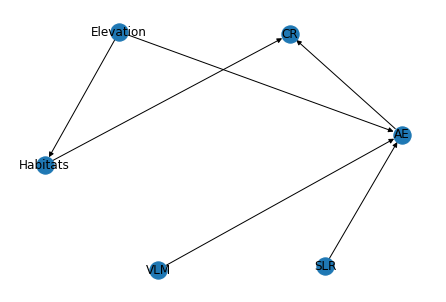

In [62]:
nx.draw(model, with_labels=True)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(final_df, final_df, test_size=0.2, random_state=44)



In [66]:
model.fit(X_train, estimator=BayesianEstimator, prior_type="BDeu")

In [67]:
model.check_model()

True

In [68]:
test_data = X_test.drop(columns=['AE', 'CR'], axis=1)
y_pred = model.predict(test_data)

100%|██████████| 123/123 [00:04<00:00, 25.03it/s]


In [69]:
y_pred

,CR,AE
0,0.50,3.0
1,0.50,5.0
2,0.50,3.0
3,0.10,4.0
4,0.50,5.0
...,...,...
357928,0.50,5.0
357929,0.10,4.0
357930,0.35,3.0
357931,0.10,4.0


In [72]:
y_test[['CR','AE']]

,CR,AE
1040070,0.50,3
831855,0.50,5
1110521,0.50,3
1638620,0.10,4
1374829,0.50,5
...,...,...
1137964,0.50,5
957966,0.10,4
247788,0.55,2
760235,0.10,4


In [76]:
y_pred.CR.value_counts()

0.50    176942
0.10     76286
0.90     40767
0.35     16092
0.00     11729
0.95     10217
0.05      9976
0.75      6088
0.25      5253
0.60      4366
1.00       144
0.80        73
Name: CR, dtype: int64

In [77]:
y_test.CR.value_counts()

0.50    151438
0.10     76353
0.90     49039
0.30     15356
0.00     11662
0.95     10227
0.35      9549
0.55      8298
0.75      6222
0.05      5282
0.25      5253
0.15      4694
0.60      4378
1.00       121
0.80        61
Name: CR, dtype: int64

In [78]:
cpds = model.get_cpds()
cpds

[<TabularCPD representing P(SLR:1) at 0x7fd5b0796eb0>,
 <TabularCPD representing P(AE:7 | Elevation:7, SLR:1, VLM:3) at 0x7fd5b0796ee0>,
 <TabularCPD representing P(VLM:3) at 0x7fd5ac9345e0>,
 <TabularCPD representing P(Elevation:7) at 0x7fd5ac9344f0>,
 <TabularCPD representing P(Habitats:6 | Elevation:7) at 0x7fd5b0796c40>,
 <TabularCPD representing P(CR:15 | AE:7, Habitats:6) at 0x7fd5b0796dc0>]

<BarContainer object of 6 artists>

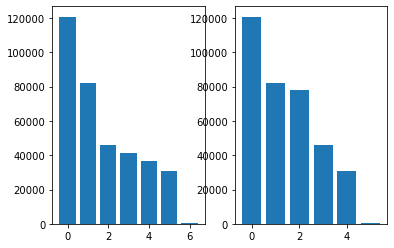

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.bar(range(len(y_test['AE'].value_counts())), y_test['AE'].value_counts())
ax2.bar(range(len(y_pred['AE'].value_counts())), y_pred['AE'].value_counts())

<BarContainer object of 12 artists>

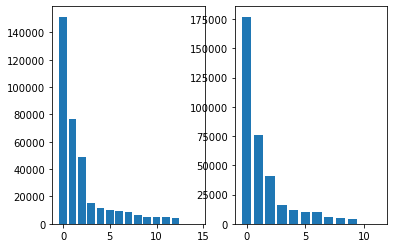

In [79]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.bar(range(len(y_test['CR'].value_counts())), y_test['CR'].value_counts())
ax2.bar(range(len(y_pred['CR'].value_counts())), y_pred['CR'].value_counts())

In [81]:
import sklearn

In [86]:
print(sklearn.metrics.accuracy_score(y_pred.AE.values, X_test.AE.values.astype('int')))


0.8970365962344908


In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("The mean absolute Error:",mean_absolute_error(X_test.CR.values, y_pred.CR.values))
print("The mean absolute Error:",mean_squared_error(X_test.CR.values, y_pred.CR.values))



The mean absolute Error: 0.02315586995331529
The mean absolute Error: 0.006313576842593448
